Analysis of simple regression data and mortality data across cities

In [222]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filename_x = "data_and_materials/syn_X.csv"
filename_y = "data_and_materials/syn_Y.csv"

In [3]:
def getData(filename):
    with open(filename, newline='') as csvfile:
        file_reader = csv.reader(csvfile, delimiter=',')
        data = []
        first_row = True
        for i in file_reader:
            if first_row:
                first_row = False
                continue
            if len(i) == 1:
                data.append(float(i[0]))
            else:
                data.append([float(i[0]), float(i[1])])
    return data

For synthetic data, can calculate best fit regression model by doing matrix multiplication

In [4]:
x = getData(filename_x)
y = getData(filename_y)

In [5]:
x1 = [i[0] for i in x]
x2 = [i[1] for i in x]

In [6]:
x = [[1, i[0], i[1]] for i in x]

In [8]:
x_np = np.asarray(x)
y_np = np.asarray(y)
xtx = x_np.T @ x_array
xtx_inv = np.linalg.inv(xtx)
b = (xtx_inv @ x_np.T) @ y_np

In [9]:
print(b)

[ 1.92739312  1.26343191 -4.59990074]


In [10]:
b_np = np.asarray(b)

Gradient Descent

In [11]:
def beta_dist(w):
    return np.linalg.norm(w - b_np)

In [112]:
# Gradient descent implementation
step_size = 0.01
iters = 10
w = np.random.normal(0, 1, size = (3, ))
ws = []
norms = []
errors = []
for i in range(iters):
    ws.append(np.ndarray.tolist(w))
    errors.append(mse(w))
    norms.append(beta_dist(w))
    residual = step_size * np.sum((x_np * np.expand_dims((y_np - x_np @ w), axis = 1)), axis = 0)
    w += residual


In [113]:
print(w)

[ 1.92733985  1.26323209 -4.59992726]


In [114]:
print(mse(b_np))

0.2436222267098768


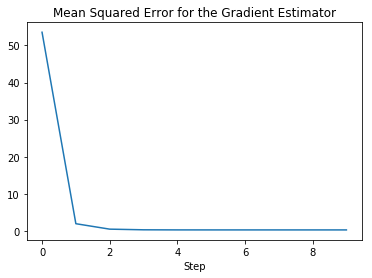

In [115]:
plt.plot(errors)
plt.title('Mean Squared Error for the Gradient Estimator')
plt.xlabel('Step')
plt.show()

Mortality across different cities

In [116]:
filename_mortality = "data_and_materials/mortality.csv"

In [131]:
# Process data
with open(filename_mortality, newline='') as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')
    data = []
    row_labels = []
    cities = []
    first_row = True
    for i in file_reader:
        if first_row:
            first_row = False
            skip = True
            for j in i:
                if skip:
                    skip = False
                    continue
                row_labels.append(j)
            continue
        first_col = True
        city = []
        for j in i:
            if first_col:
                first_col = False
                cities.append(j)
                continue
            city.append(float(j))
        data.append(city)

In [136]:
data_np = np.asarray(data)

Mortality


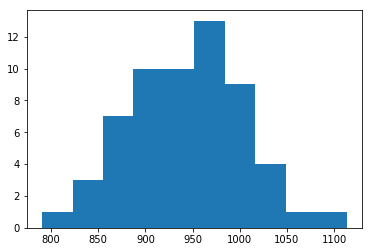

[ 921.87  997.87  962.35  982.29 1071.29 1030.38  934.7   899.53 1001.9
  912.35 1017.61 1024.89  970.47  985.95  958.84  860.1   936.23  871.77
  959.22  941.18  871.34  971.12  887.47  952.53  968.67  919.73  844.05
  861.26  989.26 1006.49  861.44  929.15  857.62  961.01  923.23 1113.16
  994.65 1015.02  991.29  893.99  938.5   946.19 1025.5   874.28  953.56
  839.71  911.7   790.73  899.26  904.16  950.67  972.46  912.2   967.8
  823.76 1003.5   895.7   911.82  954.44]
JanTemp


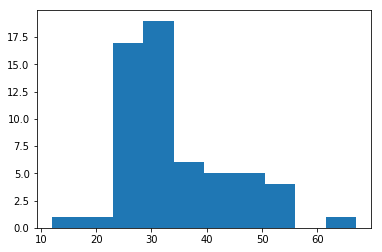

[27. 23. 29. 45. 35. 45. 30. 30. 24. 27. 42. 26. 34. 28. 31. 46. 30. 30.
 27. 24. 24. 40. 27. 55. 29. 31. 32. 53. 35. 42. 67. 20. 12. 40. 30. 54.
 33. 32. 29. 38. 29. 33. 39. 25. 32. 55. 48. 49. 40. 28. 24. 26. 23. 37.
 32. 33. 24. 33. 28.]
JulyTemp


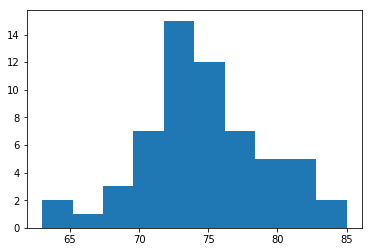

[71. 72. 74. 79. 77. 80. 74. 73. 70. 72. 79. 76. 77. 71. 75. 85. 75. 73.
 74. 72. 72. 77. 72. 84. 75. 81. 74. 68. 71. 82. 82. 69. 73. 80. 72. 81.
 77. 76. 72. 67. 72. 77. 78. 72. 79. 70. 63. 68. 64. 74. 72. 73. 71. 78.
 81. 76. 70. 76. 72.]
RelHum


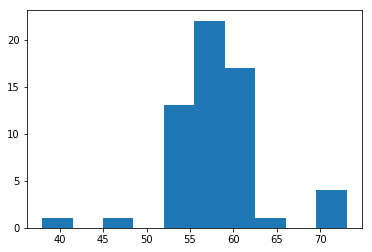

[59. 57. 54. 56. 55. 54. 56. 56. 61. 59. 56. 58. 57. 60. 58. 54. 58. 38.
 59. 61. 61. 53. 56. 59. 60. 55. 54. 47. 57. 59. 60. 64. 58. 56. 58. 62.
 58. 54. 56. 73. 56. 54. 53. 60. 57. 61. 71. 71. 72. 56. 61. 59. 60. 52.
 54. 56. 56. 54. 58.]
Rain


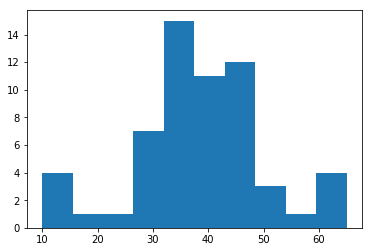

[36. 35. 44. 47. 43. 53. 43. 45. 36. 36. 52. 33. 40. 35. 37. 35. 36. 15.
 31. 30. 31. 42. 43. 46. 39. 35. 43. 11. 30. 50. 60. 30. 25. 45. 46. 54.
 42. 42. 36. 37. 42. 41. 44. 32. 34. 10. 18. 13. 35. 45. 38. 31. 40. 42.
 28. 65. 65. 62. 38.]
Educ


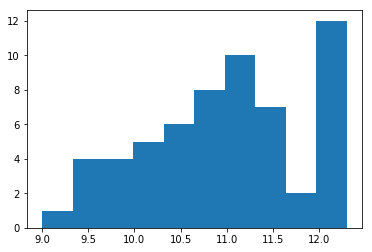

[11.4 11.   9.8 11.1  9.6 10.2 12.1 10.6 10.5 10.7  9.6 10.9 10.2 11.1
 11.9 11.8 11.4 12.2 10.8 10.8 10.9 10.4 11.5 11.4 11.4 12.   9.5 12.1
  9.9 10.4 11.5 11.1 12.1 10.1 11.3  9.7 10.7 10.5 10.6 12.  10.1  9.6
 11.  11.1  9.7 12.1 12.2 12.2 12.2 11.1 11.4 10.7 10.3 12.3 12.1 11.3
 11.1  9.  10.7]
Dens


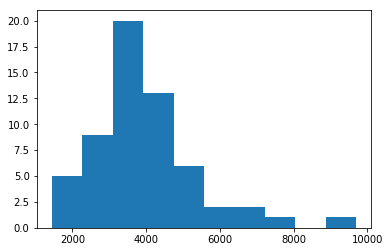

[3243. 4281. 4260. 3125. 6441. 3325. 4679. 2140. 6582. 4213. 2302. 6122.
 4101. 3042. 4259. 1441. 4029. 4824. 4834. 3694. 3226. 2269. 2909. 2647.
 4412. 3262. 3214. 4700. 4474. 3497. 4657. 2934. 2095. 2682. 3327. 3172.
 7462. 6092. 3437. 3387. 3508. 4843. 3768. 4355. 5160. 3033. 4253. 2702.
 3626. 1883. 4923. 3249. 1671. 5308. 3665. 3152. 3678. 9699. 3451.]
NonWhite


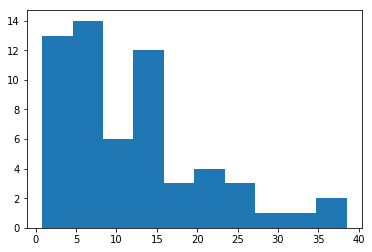

[ 8.8  3.5  0.8 27.1 24.4 38.5  3.5  5.3  8.1  6.7 22.2 16.3 13.  14.7
 13.1 14.8 12.4  4.7 15.8 13.1  5.1 22.7  7.2 21.  15.6 12.6  2.9  7.8
 13.1 36.7 13.5  5.8  2.  21.   8.8 31.4 11.3 17.5  8.1  3.6  2.2  2.7
 28.6  5.  17.2  5.9 13.7  3.   5.7  3.4  3.8  9.5  2.5 25.9  7.5 12.1
  1.   4.8 11.7]
WhiteCollar


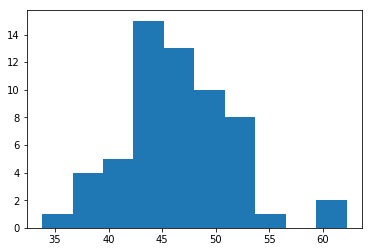

[42.6 50.7 39.4 50.2 43.7 43.1 49.2 40.4 42.5 41.  41.3 44.9 45.7 44.6
 49.6 51.2 44.  53.1 43.5 33.8 45.2 41.4 51.6 46.9 46.6 48.6 43.7 48.9
 42.6 43.3 47.3 44.  51.9 46.1 45.3 45.5 48.7 45.3 45.5 50.3 38.8 38.6
 49.5 46.4 45.1 51.  51.2 51.9 54.3 41.9 50.5 43.9 47.4 59.7 51.6 47.3
 44.8 62.2 37.5]
Pop


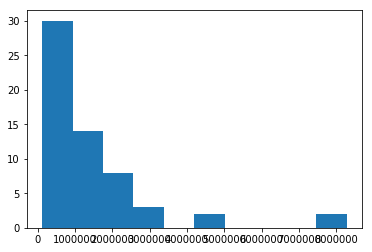

[ 660328.  835880.  635481. 2138231. 2199531.  883946. 2805911.  438557.
 1015472.  404421.  426540.  606387. 1401491. 1898825.  124833. 1957378.
  942083. 1428836. 4488072.  450449.  601680.  851851.  715923. 2735766.
 1166575.  914427.  362346. 7477503.  956756.  913472. 1625781. 1397143.
 2137133.  850505.  500474. 1256256. 8274961. 4716818. 2218870. 1105699.
  618514.  312509.  761311.  971230. 1808621. 1861846. 1488871. 1295071.
 1607469.  515259.  642971.  616864.  320180. 3250822.  411313.  523221.
  402918.  381255.  531350.]
House


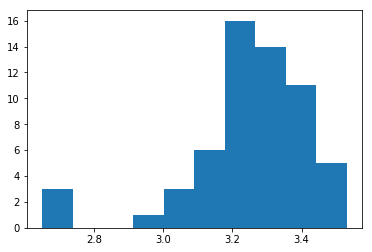

[3.34 3.14 3.21 3.41 3.44 3.45 3.23 3.29 3.31 3.36 3.39 3.2  3.21 3.29
 3.26 3.22 3.35 3.15 3.44 3.53 3.37 3.45 3.25 3.35 3.23 3.1  3.38 2.66
 3.37 3.49 2.65 3.26 3.28 3.32 3.16 3.36 3.03 3.32 3.32 2.66 3.16 3.08
 3.32 3.21 3.23 3.11 2.92 3.36 3.02 3.21 3.34 3.22 3.28 3.25 3.27 3.39
 3.25 3.22 3.48]
Income


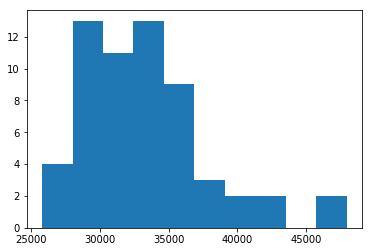

[29560. 31458. 31856. 32452. 32368. 27835. 36644. 47258. 31248. 29089.
 25782. 36593. 31427. 35720. 29761. 38769. 30232. 39099. 33858. 32000.
 29915. 29450. 37565. 39558. 31461. 30783. 30248. 36624. 29621. 27910.
 32808. 35272. 35871. 28641. 34364. 32704. 36047. 33449. 32934. 33020.
 30094. 32449. 33510. 34896. 34546. 32586. 47966. 41994. 37069. 29327.
 30114. 30497. 27305. 41888. 34812. 33927. 29374. 28985. 28960.]
HC


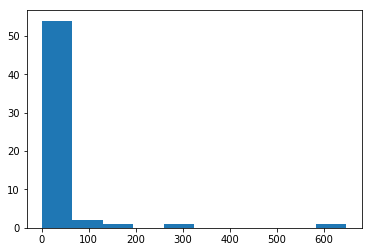

[ 21.   8.   6.  18.  43.  30.  21.   6.  18.  12.  18.  88.  26.  31.
  23.   1.   6.  17.  52.  11.   5.   8.   7.   6.  13.   7.  11. 648.
  38.  15.   3.  33.  20.  17.   4.  20.  41.  29.  45.  56.   6.  11.
  12.   7.  31. 144. 311. 105.  20.   5.   8.  11.   5.  65.   4.  14.
   7.   8.  14.]
NOx


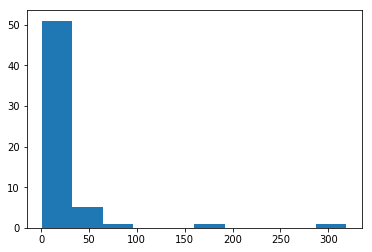

[ 15.  10.   6.   8.  38.  32.  32.   4.  12.   7.   8.  63.  26.  21.
   9.   1.   4.   8.  35.   4.   3.   3.   3.   5.   7.   4.   7. 319.
  37.  18.   1.  23.  11.  14.   3.  17.  26.  32.  59.  21.   4.  11.
   9.   4.  15.  66. 171.  32.   7.   1.   5.   7.   2.  28.   2.  11.
   3.   8.  13.]
SO2


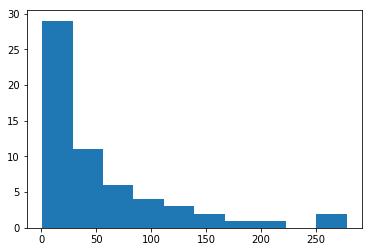

[ 59.  39.  33.  24. 206.  72.  62.   4.  37.  20.  27. 278. 146.  64.
  15.   1.  16.  28. 124.  11.  10.   5.  10.   1.  33.   4.  32. 130.
 193.  34.   1. 125.  26.  78.   8.   1. 108. 161. 263.  44.  18.  89.
  48.  18.  68.  20.  86.   3.  20.  20.  25.  25.  11. 102.   1.  42.
   8.  49.  39.]


In [145]:
# View plots
for i in range(len(row_labels)):
    plt.hist(data_np[:, i])
    print(row_labels[i])
    plt.show()
    print(data_np[:, i])

((array([-2.26751093, -1.90574552, -1.6934328 , -1.53794117, -1.41266963,
         -1.30632291, -1.21299259, -1.12917851, -1.05262603, -0.98179205,
         -0.91557053, -0.85313927, -0.79386855, -0.73726396, -0.68292896,
         -0.63053958, -0.57982669, -0.53056337, -0.48255566, -0.43563558,
         -0.38965586, -0.34448587, -0.30000832, -0.25611675, -0.21271332,
         -0.16970714, -0.1270127 , -0.08454864, -0.04223656,  0.        ,
          0.04223656,  0.08454864,  0.1270127 ,  0.16970714,  0.21271332,
          0.25611675,  0.30000832,  0.34448587,  0.38965586,  0.43563558,
          0.48255566,  0.53056337,  0.57982669,  0.63053958,  0.68292896,
          0.73726396,  0.79386855,  0.85313927,  0.91557053,  0.98179205,
          1.05262603,  1.12917851,  1.21299259,  1.30632291,  1.41266963,
          1.53794117,  1.6934328 ,  1.90574552,  2.26751093]),
  array([  1.,   1.,   1.,   1.,   1.,   3.,   4.,   4.,   5.,   8.,   8.,
          10.,  10.,  11.,  11.,  15.,  16.,  18

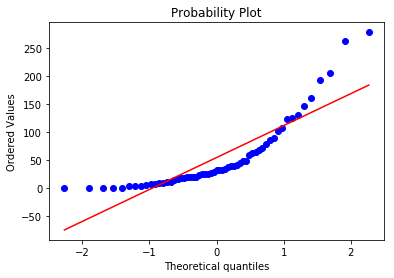

In [165]:
# qq plot
stats.probplot(data_np[:, 14], plot = plt)

In [354]:
# get mean squared error for a set of weights
def mse(w, x_np, y_np):
    return np.mean(np.square(y_np - (x_np @ w)))

# gradient descent, given starting weights, step size, and number of iterations
def grad_descent(w0, x_np, y_np, step_size, iters):
    w = w0
    errors = []
    ws = []
    residuals = []
    for i in range(iters):
        ws.append(np.ndarray.tolist(w))
        errors.append(mse(w, x_np, y_np))
        res = step_size * np.sum((x_np * np.expand_dims((y_np - x_np @ w), axis = 1)), axis = 0)
        residuals.append(res)
        w += res
    return w, ws, residuals, errors

In [355]:
y_np = data_np[:, 0]
x_np = np.concatenate((np.ones((len(cities), 1)), data_np[:, 1:]), axis = 1)
w0 = np.random.normal(0, 1, size = (len(row_labels),))
step_size = 1e-15
iters = 50
w, ws, residuals, errors = grad_descent(w0, x_np, y_np, step_size, iters)

In [360]:
# get the total residual for each time step
def norm_residuals(res):
    return np.apply_along_axis(np.linalg.norm, 1, res)

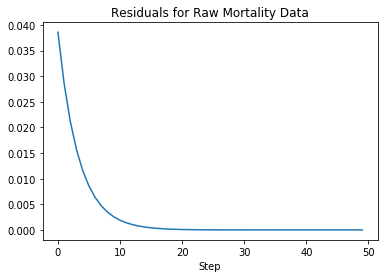

In [362]:
res = norm_residuals(residuals)
plt.title('Residuals for Raw Mortality Data')
plt.xlabel('Step')
plt.plot(res)
plt.show()

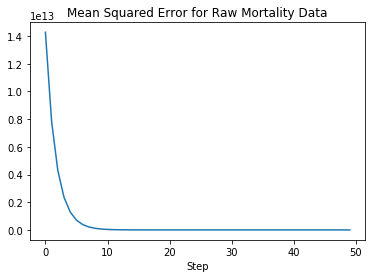

In [314]:
plt.plot(errors)
plt.title('Mean Squared Error for Raw Mortality Data')
plt.xlabel('Step')
plt.show()

In [315]:
print(errors)

[14269979755711.76, 7816256825891.901, 4281301959402.806, 2345069795343.2515, 1284520187693.166, 703615948457.8898, 385432118300.0094, 211150466482.63733, 115689630314.42482, 63402018146.391136, 34762058634.87761, 19074837518.90329, 10482334613.728136, 5775884599.797387, 3197976780.966069, 1785954245.5770655, 1012532390.7008152, 588896947.0791379, 356853115.04654676, 229751454.79010078, 160130700.6059111, 121994472.7472837, 101103543.71129152, 89658535.20542401, 83387424.6261203, 79950259.16677083, 78065355.73594834, 77030686.69351372, 76461724.21755719, 76147847.47583282, 75973691.25300355, 75876065.53709958, 75820358.7027571, 75787612.61761852, 75767443.1757983, 75754162.59892832, 75744655.46973823, 75737215.35310254, 75730907.56817478, 75725220.15392016, 75719872.68937346, 75714711.57706393, 75709652.6856775, 75704649.93321396, 75699678.07876098, 75694723.2968801, 75689778.01483135, 75684838.08472101, 75679901.23457646, 75674966.21994023]


Normalizing features and repeating gradient descent

In [419]:
x_norm = np.apply_along_axis(lambda x : (x - np.mean(x))/np.std(x), 0, data_np[:, 1:])
x_norm = np.concatenate((np.ones((len(cities), 1)), x_norm), axis = 1)

In [420]:
y_norm = (y_np - np.mean(y_np)) / np.std(y_np)

In [433]:
w0 = np.random.normal(0, 1, size = (len(row_labels),))
step_size = 0.005
iters = 100
w, ws, residuals, errors = grad_descent(w0, x_norm, y_norm, step_size, iters)

In [434]:
# Print keys with highest weights
w_sorted = list(enumerate(w))
w_sorted.sort(key = lambda x: x[1])
print(w_sorted)

[(13, -0.2573502783908698), (1, -0.24370958746704988), (2, -0.2003154723147748), (8, -0.1462720921181328), (5, -0.12951680092770967), (10, -0.08669758421008526), (11, -0.022252395022970224), (0, 6.544782953446822e-16), (3, 0.012208511155181), (9, 0.06533193957741866), (6, 0.10895625305505865), (12, 0.1385194765281012), (4, 0.23380434645703158), (14, 0.2512412044393856), (7, 0.7627732771437431)]


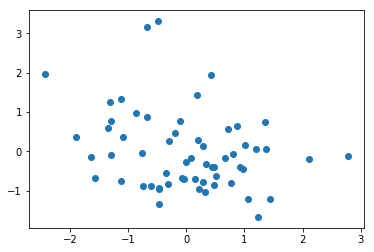

In [441]:
# View relationships between a specific feature and overall mortality
plt.scatter(y_norm, x_norm[:, 11])
plt.show()

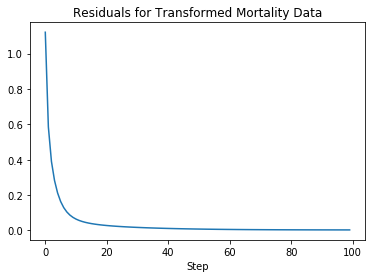

In [436]:
res = norm_residuals(residuals)
plt.title('Residuals for Transformed Mortality Data')
plt.xlabel('Step')
plt.plot(res)
plt.show()

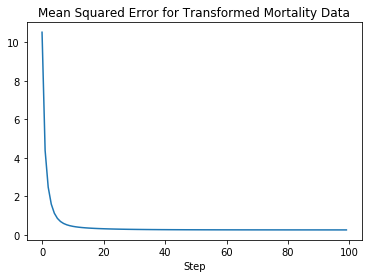

In [437]:
plt.plot(errors)
plt.title('Mean Squared Error for Transformed Mortality Data')
plt.xlabel('Step')
plt.show()